## Exploratory analysis of Kinect data from Python session 

(E and K pair debugging an implementation of the hangman game)

In [1]:
# Import software libraries
import numpy as np
from sklearn.cluster import KMeans
import pandas as pd

import seaborn as sns # for the nicer default plot aesthetics 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
% matplotlib inline 
# % matplotlib notebook

from IPython.display import display
pd.options.display.max_columns = None
import pprint as pp

import helpers # written by us for MMLA pipeline purposes

In [2]:
# Import data from Unity or Python session
# kinectSkeleton.csv is the current name for the Python session 
# Contact repository owners if you would like an anonymized data sample to run this notebook on your computer
skeleton_df = pd.read_csv('data/kinectSkeleton.csv', sep=';', names=helpers.col_names())

In [3]:
# Clustering
kmeans = KMeans(n_clusters=8, random_state=0).fit(skeleton_df)
print(kmeans.labels_)
#kmeans.predict([[unseen data goes here]])
kmeans.cluster_centers_

[1 1 6 ..., 2 2 2]


array([[  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          1.79712000e+02,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          1.80000000e+02,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
         -1.08286713e-11,   0.00000000e+00,   0.00000000e+00],
       ..., 
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          1.80000000e+02,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          1.79951541e+02,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          1.80000000e+02,   0.00000000e+00,   0.00000000e+00]])

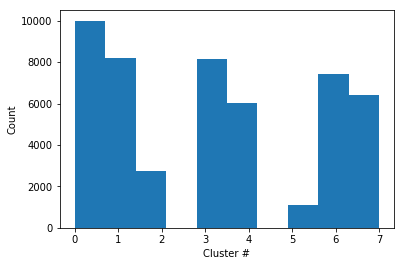

In [4]:
# Quick overview of how many rows are in each cluster
plt.figure()
plt.hist(kmeans.labels_)
plt.xlabel('Cluster #')
plt.ylabel('Count')
plt.show()

In [5]:
# Set up dataframe of XYZ position columns
kinect_xyz_df = helpers.create_xyz_df(skeleton_df)

In [6]:
# Add ClusterLabel column to dataframes
kinect_xyz_df.loc[:, 'ClusterLabel'] = kmeans.labels_
skeleton_df.loc[:, 'ClusterLabel'] = kmeans.labels_

/Users/eqw5176/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/eqw5176/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [7]:
# Check 
kinect_xyz_df.head()

,HIP_CENTER_POS_X_P1,HIP_CENTER_POS_Y_P1,HIP_CENTER_POS_Z_P1,SPINE_POS_X_P1,SPINE_POS_Y_P1,SPINE_POS_Z_P1,SHOULDER_CENTER_POS_X_P1,SHOULDER_CENTER_POS_Y_P1,SHOULDER_CENTER_POS_Z_P1,HEAD_POS_X_P1,HEAD_POS_Y_P1,HEAD_POS_Z_P1,SHOULDER_LEFT_POS_X_P1,SHOULDER_LEFT_POS_Y_P1,SHOULDER_LEFT_POS_Z_P1,ELBOW_LEFT_POS_X_P1,ELBOW_LEFT_POS_Y_P1,ELBOW_LEFT_POS_Z_P1,WRIST_LEFT_POS_X_P1,WRIST_LEFT_POS_Y_P1,WRIST_LEFT_POS_Z_P1,HAND_LEFT_POS_X_P1,HAND_LEFT_POS_Y_P1,HAND_LEFT_POS_Z_P1,SHOULDER_RIGHT_POS_X_P1,SHOULDER_RIGHT_POS_Y_P1,SHOULDER_RIGHT_POS_Z_P1,ELBOW_RIGHT_POS_X_P1,ELBOW_RIGHT_POS_Y_P1,ELBOW_RIGHT_POS_Z_P1,WRIST_RIGHT_POS_X_P1,WRIST_RIGHT_POS_Y_P1,WRIST_RIGHT_POS_Z_P1,HAND_RIGHT_POS_X_P1,HAND_RIGHT_POS_Y_P1,HAND_RIGHT_POS_Z_P1,HIP_LEFT_POS_X_P1,HIP_LEFT_POS_Y_P1,HIP_LEFT_POS_Z_P1,KNEE_LEFT_POS_X_P1,KNEE_LEFT_POS_Y_P1,KNEE_LEFT_POS_Z_P1,ANKLE_LEFT_POS_X_P1,ANKLE_LEFT_POS_Y_P1,ANKLE_LEFT_POS_Z_P1,FOOT_LEFT_POS_X_P1,FOOT_LEFT_POS_Y_P1,FOOT_LEFT_POS_Z_P1,HIP_RIGHT_POS_X_P1,HIP_RIGHT_POS_Y_P1,HIP_RIGHT_POS_Z_P1,KNEE_RIGHT_POS_X_P1,KNEE_RIGHT_POS_Y_P1,KNEE_RIGHT_POS_Z_P1,ANKLE_RIGHT_POS_X_P1,ANKLE_RIGHT_POS_Y_P1,ANKLE_RIGHT_POS_Z_P1,FOOT_RIGHT_POS_X_P1,FOOT_RIGHT_POS_Y_P1,FOOT_RIGHT_POS_Z_P1,HIP_CENTER_POS_X_P2,HIP_CENTER_POS_Y_P2,HIP_CENTER_POS_Z_P2,SPINE_POS_X_P2,SPINE_POS_Y_P2,SPINE_POS_Z_P2,SHOULDER_CENTER_POS_X_P2,SHOULDER_CENTER_POS_Y_P2,SHOULDER_CENTER_POS_Z_P2,HEAD_POS_X_P2,HEAD_POS_Y_P2,HEAD_POS_Z_P2,SHOULDER_LEFT_POS_X_P2,SHOULDER_LEFT_POS_Y_P2,SHOULDER_LEFT_POS_Z_P2,ELBOW_LEFT_POS_X_P2,ELBOW_LEFT_POS_Y_P2,ELBOW_LEFT_POS_Z_P2,WRIST_LEFT_POS_X_P2,WRIST_LEFT_POS_Y_P2,WRIST_LEFT_POS_Z_P2,HAND_LEFT_POS_X_P2,HAND_LEFT_POS_Y_P2,HAND_LEFT_POS_Z_P2,SHOULDER_RIGHT_POS_X_P2,SHOULDER_RIGHT_POS_Y_P2,SHOULDER_RIGHT_POS_Z_P2,ELBOW_RIGHT_POS_X_P2,ELBOW_RIGHT_POS_Y_P2,ELBOW_RIGHT_POS_Z_P2,WRIST_RIGHT_POS_X_P2,WRIST_RIGHT_POS_Y_P2,WRIST_RIGHT_POS_Z_P2,HAND_RIGHT_POS_X_P2,HAND_RIGHT_POS_Y_P2,HAND_RIGHT_POS_Z_P2,HIP_LEFT_POS_X_P2,HIP_LEFT_POS_Y_P2,HIP_LEFT_POS_Z_P2,KNEE_LEFT_POS_X_P2,KNEE_LEFT_POS_Y_P2,KNEE_LEFT_POS_Z_P2,ANKLE_LEFT_POS_X_P2,ANKLE_LEFT_POS_Y_P2,ANKLE_LEFT_POS_Z_P2,FOOT_LEFT_POS_X_P2,FOOT_LEFT_POS_Y_P2,FOOT_LEFT_POS_Z_P2,HIP_RIGHT_POS_X_P2,HIP_RIGHT_POS_Y_P2,HIP_RIGHT_POS_Z_P2,KNEE_RIGHT_POS_X_P2,KNEE_RIGHT_POS_Y_P2,KNEE_RIGHT_POS_Z_P2,ANKLE_RIGHT_POS_X_P2,ANKLE_RIGHT_POS_Y_P2,ANKLE_RIGHT_POS_Z_P2,FOOT_RIGHT_POS_X_P2,FOOT_RIGHT_POS_Y_P2,FOOT_RIGHT_POS_Z_P2,ClusterLabel
0,0,0,0,0,0,0,-0.276159,-0.021870,0.949868,-0.233884,0.159568,0.874928,-0.389405,-0.112827,0.896459,-0.411773,-0.284120,0.885011,-0.354477,-0.298829,0.724445,-0.301699,-0.297826,0.706334,-0.154144,-0.109926,1.017292,-0.143401,-0.318631,0.999084,-0.056830,-0.303224,0.787932,-0.001093,-0.301661,0.785593,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.245414,0.007833,1.075272,0.242526,0.174419,1.062774,0.111396,-0.108937,1.076196,0.077438,-0.314570,1.080690,0.109202,-0.304392,0.850763,0.124646,-0.299738,0.744870,0.362480,-0.117000,1.040686,0.464598,-0.284970,1.032181,0.568242,-0.455448,1.032375,0.603205,-0.512957,1.035440,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,-0.276159,-0.021870,0.949868,-0.233884,0.159568,0.874928,-0.389405,-0.112827,0.896459,-0.411773,-0.284120,0.885011,-0.354477,-0.298829,0.724445,-0.301699,-0.297826,0.706334,-0.154144,-0.109926,1.017292,-0.143401,-0.318631,0.999084,-0.056830,-0.303224,0.787932,-0.001093,-0.301661,0.785593,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.245414,0.007833,1.075272,0.242526,0.174419,1.062774,0.111396,-0.108937,1.076196,0.077438,-0.314570,1.080690,0.109202,-0.304392,0.850763,0.124646,-0.299738,0.744870,0.362480,-0.117000,1.040686,0.464598,-0.284970,1.032181,0.568242,-0.455448,1.032375,0.603205,-0.512957,1.035440,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,-0.277411,-0.020799,0.949096,-0.233796,0.159954,0.875210,-0.389729,-0.110922,0.896476,-0.411665,-0.282934,0.885031,-0.354486,-0.298994,0.724585,-0.299848,-0.298623,0.713548,-0.154038,-0.109693,1.017354,

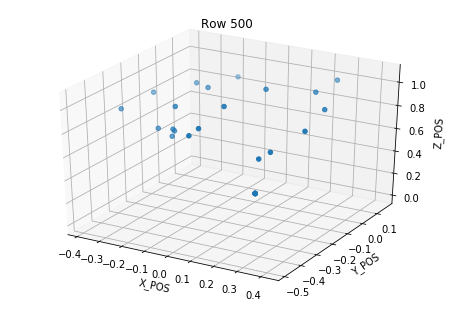

In [8]:
# Plotting a point cloud for a specific row (Kinect data sample)
plt.figure()
row = kinect_xyz_df.iloc[500]
row_triples = helpers.xyz_triples(row)
helpers.plot_xyz_triples(row_triples, title='Row 500')
plt.show()

Once we have the header for the Kinect data we can follow up on what body positions these clusters correspond to and try

(1) Find average of position of each skelton.joint.cluster
(2) Visualization of joint.clusters 
(3) Markov state transition diagram of those body positions
(4) label all data points according to their cluster, name those clusters and something like "active", "passive" "happy".


In [9]:
PairOccurrences = {}
for a in range(8):
    for b in range(8):
        PairOccurrences[a,b] = 0
        
for c in range (0,len(kinect_xyz_df.index)-2):
    PairOccurrences[int(kinect_xyz_df.iloc[c]['ClusterLabel']),int(kinect_xyz_df.iloc[c+1]['ClusterLabel'])] +=1 

num_transitions = sum(PairOccurrences.values())
transitionFrequencies = {}
for k in PairOccurrences.keys():
    transitionFrequencies[k] = PairOccurrences[k] / num_transitions * 100

In [10]:
pp.pprint(transitionFrequencies)

{(0, 0): 18.761362501248627,
 (0, 1): 0.23374288282888822,
 (0, 2): 0.0079912096693637,
 (0, 3): 0.2477274997502747,
 (0, 4): 0.28368794326241137,
 (0, 5): 0.009989012086704625,
 (0, 6): 0.24572969733293376,
 (0, 7): 0.18779342723004694,
 (1, 0): 0.22175606832484265,
 (1, 1): 10.02297472779942,
 (1, 2): 0.0,
 (1, 3): 1.7420837079212868,
 (1, 4): 1.1567275996403956,
 (1, 5): 0.0,
 (1, 6): 1.8040155828588553,
 (1, 7): 1.4184397163120568,
 (2, 0): 0.005993407252022775,
 (2, 1): 0.0,
 (2, 2): 5.477974228348816,
 (2, 3): 0.0,
 (2, 4): 0.0,
 (2, 5): 0.0,
 (2, 6): 0.0,
 (2, 7): 0.0,
 (3, 0): 0.24373189491559283,
 (3, 1): 1.8080111876935372,
 (3, 2): 0.0,
 (3, 3): 9.877135151333533,
 (3, 4): 1.3125561881929877,
 (3, 5): 0.0,
 (3, 6): 1.628208970132854,
 (3, 7): 1.4064529018080112,
 (4, 0): 0.2637099190890021,
 (4, 1): 1.2386374987513735,
 (4, 2): 0.0,
 (4, 3): 1.2586155229247826,
 (4, 4): 8.105084407152132,
 (4, 5): 0.0,
 (4, 6): 0.30566376985316157,
 (4, 7): 0.9149935071421436,
 (5, 0): 0.009

In [11]:
NtoN = 0
for i in range(0, 8):
    NtoN += float(transitionFrequencies[(i, i)])

print(NtoN, '% of the time KBR and EQW transitioned from state N to state N')

71.58525621816003 % of the time KBR and EQW transitioned from state N to state N


### Visualizing skeletons

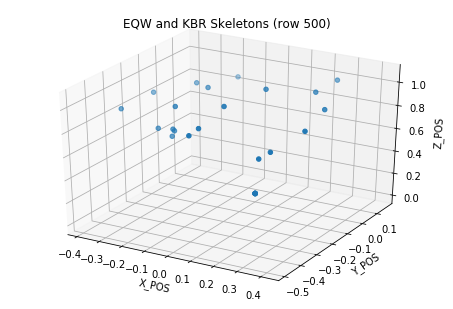

In [12]:
row = kinect_xyz_df.iloc[500]
row_triples = helpers.xyz_triples(row)

fig = plt.figure(1)
ax = Axes3D(fig)
ax.scatter(row_triples['X_POS'], row_triples['Y_POS'], row_triples['Z_POS'])
ax.set_xlabel('X_POS')
ax.set_ylabel('Y_POS')
ax.set_zlabel('Z_POS')
ax.set_title('EQW and KBR Skeletons (row 500)')

# TODO: put into helpers.py eventually
def draw_line(ax, a, b):    
    x = np.linspace(a[0], b[0], 100)
    y = np.linspace(a[1], b[1], 100)
    z = np.linspace(a[2], b[2], 100)
    ax.plot(x, y, z)

In [13]:
# Drop all the lower body positions before clustering/analyzing (skeleton_df_upper)

# TODO: put into helpers.py eventually
UPPER_PARTS = ['SHOULDER', 'HEAD', 'ELBOW', 'WRIST', 'HAND'] 
UPPER_PARTS_COLS = []

for c in skeleton_df.columns.values.tolist():
    for part in UPPER_PARTS:
        if ('POS' in c) and (part in c) and ('CONF' not in c):
            UPPER_PARTS_COLS.append(c)

skeleton_df_upper = skeleton_df[UPPER_PARTS_COLS]

In [14]:
# TODO: put into helpers.py eventually 
JOINT_PAIRS = [
                ['WRIST_LEFT', 'HAND_LEFT'],
                ['WRIST_LEFT', 'ELBOW_LEFT'],
                ['ELBOW_LEFT', 'SHOULDER_LEFT'],
                ['SHOULDER_LEFT', 'SHOULDER_CENTER'],
                ['SHOULDER_CENTER', 'SHOULDER_RIGHT'],
                ['ELBOW_RIGHT', 'SHOULDER_RIGHT'],
                ['WRIST_RIGHT', 'ELBOW_RIGHT'],
                ['WRIST_RIGHT', 'HAND_RIGHT'],
                ['SHOULDER_CENTER', 'HEAD'],
              ]

def plot_skeleton(ax, row):
    # expecting row to be from a dataframe with UPPER_PARTS_COLS values
    
    for person in ['P1', 'P2']:
        for jp in JOINT_PAIRS:
            draw_line(ax, [row[jp[0]+'_POS_X_'+person], row[jp[0]+'_POS_Z_'+person], row[jp[0]+'_POS_Y_'+person]], 
                          [row[jp[1]+'_POS_X_'+person], row[jp[1]+'_POS_Z_'+person], row[jp[1]+'_POS_Y_'+person]])
                
    return 

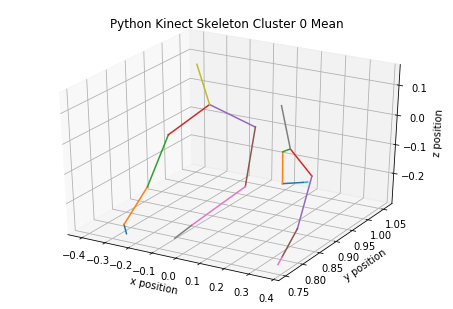

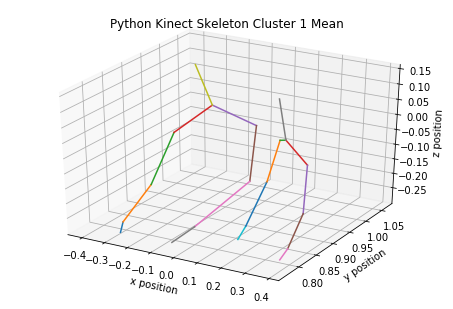

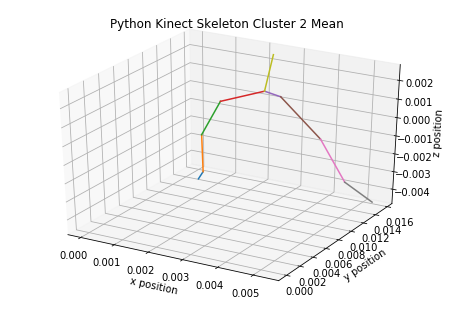

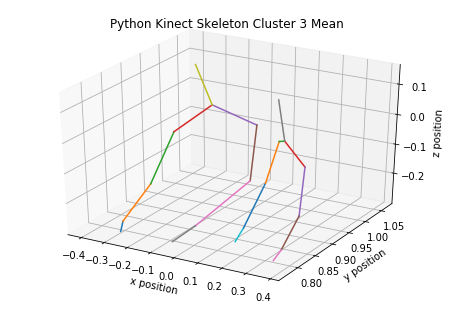

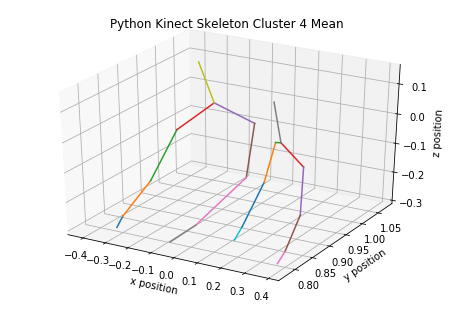

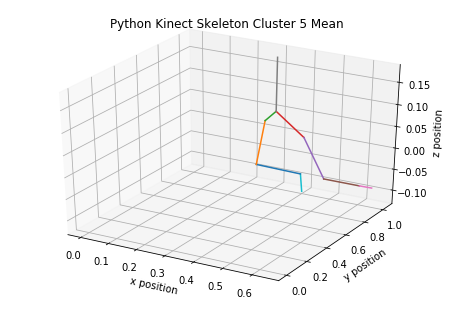

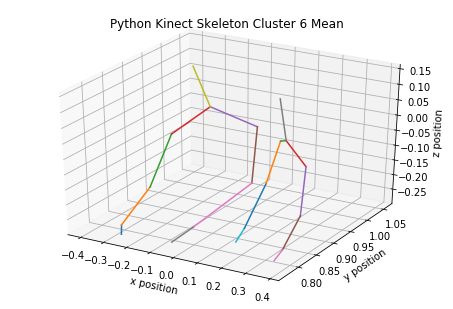

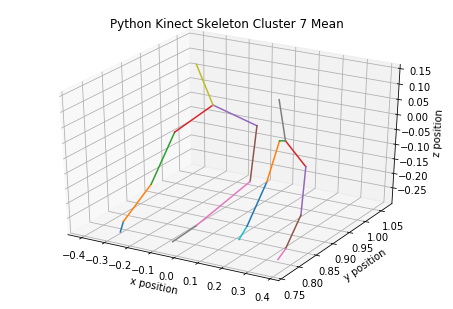

In [15]:
# Group by cluster for individual cluster analysis
clusters = skeleton_df.groupby('ClusterLabel')
SKELETON_FIGS_REPO = 'skeletonFigs/'

for i in range(0, 8):
    cluster = clusters.get_group(i)
    centroid = cluster.mean()
    title = 'Python Kinect Skeleton Cluster ' + str(i) + ' Mean'
    filename = SKELETON_FIGS_REPO +title.replace(' ', '')+'.png'

    fig = plt.figure(5)
    ax = Axes3D(fig)
    plot_skeleton(ax, centroid)
    ax.set_xlabel('x position')
    ax.set_ylabel('y position')
    ax.set_zlabel('z position')
    ax.set_title(title)
    plt.savefig(filename, dpi=300)
    plt.show()

^ Cluster 7 = hands out passive

### Markov Analysis with networkx

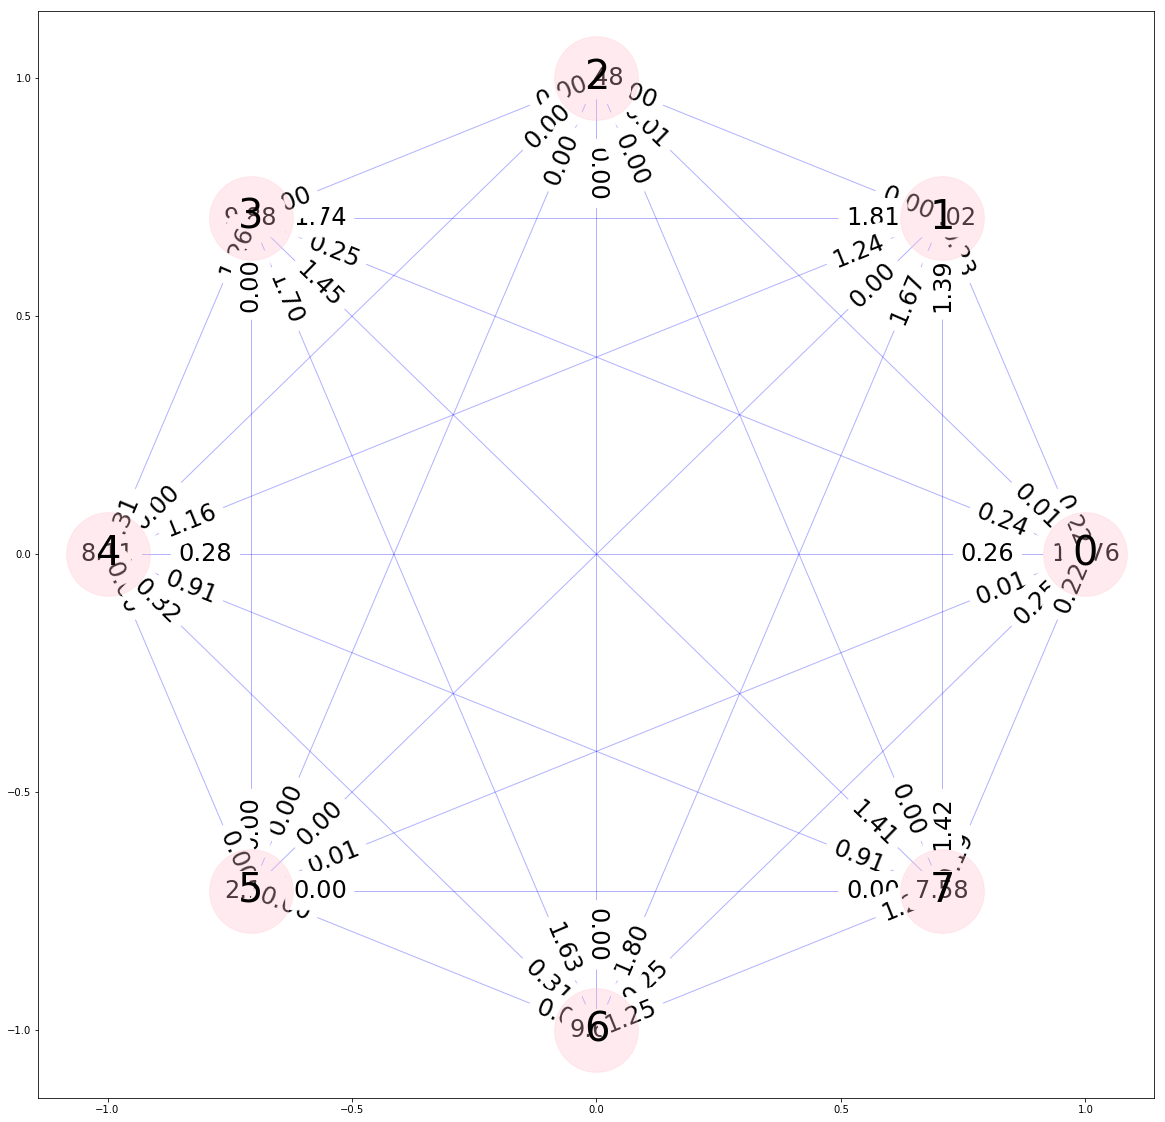

In [16]:
PairOccurrences = {}
for a in range(8):
    for b in range(8):
        PairOccurrences[a,b] = 0
        
for c in range (0,len(kinect_xyz_df.index)-2):
    PairOccurrences[int(kinect_xyz_df.iloc[c]['ClusterLabel']),
                    int(kinect_xyz_df.iloc[c+1]['ClusterLabel'])] +=1 

num_transitions = sum(PairOccurrences.values())
transitionFrequencies = {}
for k in PairOccurrences.keys():
    transitionFrequencies[k] = format(PairOccurrences[k] / num_transitions * 100, '.2f')
plt.figure(figsize=(20,20))
helpers.draw_graph(transitionFrequencies)